<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r15_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-1-r15.csv?token=AKVFSOGFDC75YKXKWNBM67C63JJVE')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-15-r15.csv?token=AKVFSOCRVU5HHXZ5Z37GBOK63JJWI')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,3,2,0,0.0,4,63,1,63,63,0,12,3,27,0
1,7,3,0,1,1,4,3,9,15,15,23,7,2,2,0,0.0,4,62,1,62,62,0,8,3,27,1
2,62,0,3,4,1,1,5,17,23,7,15,15,2,2,2,1.0,12,61,2,62,122,0,8,20,340,1
3,62,0,3,4,1,1,5,17,23,7,15,15,3,2,2,1.0,12,62,2,63,124,0,12,20,340,0
4,63,0,3,4,2,2,5,17,23,7,15,15,2,2,2,1.0,13,60,3,62,180,0,32,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166494,3276881,3,0,5,3,2,3,9,15,15,27,11,30095,1,0,0.0,18,5,56,60,280,0,902850,15,135,0
166495,3276888,3,0,5,4,2,3,9,15,15,27,11,30095,1,0,0.0,25,4,57,60,228,0,1203800,15,135,0
166496,3276895,3,0,5,5,3,3,9,15,15,27,11,30095,1,0,0.0,32,3,58,60,174,0,2257125,15,135,0
166497,3276896,3,0,1,1,4,3,10,15,15,27,11,30096,1,0,0.0,32,2,59,60,118,0,120384,3,30,0


In [6]:
df.shape

(166499, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-11-r15.csv?token=AKVFSOAFEHDGNJ6UICOJZQS63JJVK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-12-r15.csv?token=AKVFSOFCIIATN53BXPZZYAS63JK5C')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-7-r15.csv?token=AKVFSOGNEHOF57IWO2H7FXC63JK5G')

In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(88873, 26)
(94994, 26)
(88862, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.612706,0.058701,-0.003065,0.004769,-0.744994,-0.680398,0.031476,0.017729,-0.702747,-0.856820,0.013566,0.012376,-0.020800,-0.006887,-0.000912,0.253610,0.068552,-0.520436,-0.725082,-0.012803
inport,-0.612706,1.000000,0.101574,0.004904,-0.007632,0.466577,0.348418,0.012898,0.111076,0.702273,0.889943,0.185036,-0.014051,0.017269,0.002632,0.009164,0.540551,0.018482,0.448568,0.471488,-0.033405
cache_coherence_type,0.058701,0.101574,1.000000,0.184560,-0.287193,-0.276178,-0.346603,0.044077,-0.032610,0.003022,-0.005030,-0.265793,0.024858,-0.015322,0.007796,0.017217,0.211763,0.283979,0.674213,0.114007,-0.020100
flit_id,-0.003065,0.004904,0.184560,1.000000,0.042461,0.165682,0.144256,0.002448,0.009291,0.018619,0.011682,0.399825,-0.024673,0.019748,-0.004026,-0.004153,0.003792,0.635803,0.290914,0.249141,0.003797
flit_type,0.004769,-0.007632,-0.287193,0.042461,1.000000,-0.257817,-0.224476,-0.003809,-0.014458,-0.028973,-0.018178,0.477184,-0.034005,0.042273,0.006759,0.008235,-0.005901,0.174361,-0.452691,-0.387686,-0.005909
vnet,-0.744994,0.466577,-0.276178,0.165682,-0.257817,1.000000,0.967291,-0.054561,0.055418,0.530783,0.713578,-0.113476,-0.040114,0.011614,-0.023299,-0.038579,-0.286690,-0.078205,0.523609,0.915722,0.039413
vc,-0.680398,0.348418,-0.346603,0.144256,-0.224476,0.967291,1.000000,-0.063847,0.028962,0.442509,0.610792,-0.121836,-0.039347,0.015608,-0.019408,-0.036009,-0.361584,-0.104966,0.436048,0.882368,0.044470
traversal_id,0.031476,0.012898,0.044077,0.002448,-0.003809,-0.054561,-0.063847,1.000000,-0.038345,-0.021241,-0.012782,0.027471,0.159557,0.160624,0.261759,0.204877,0.058635,0.557964,-0.002854,-0.043733,-0.327027
hop_count,0.017729,0.111076,-0.032610,0.009291,-0.014458,0.055418,0.028962,-0.038345,1.000000,0.541343,0.167653,0.361511,-0.068904,-0.076588,-0.118944,-0.105496,-0.024354,-0.030759,0.013678,0.028149,0.003234
current_hop,-0.702747,0.702273,0.003022,0.018619,-0.028973,0.530783,0.442509,-0.021241,0.541343,1.000000,0.816765,0.370555,-0.034326,-0.028751,-0.051567,-0.041835,0.059846,-0.027941,0.410544,0.511971,-0.011454


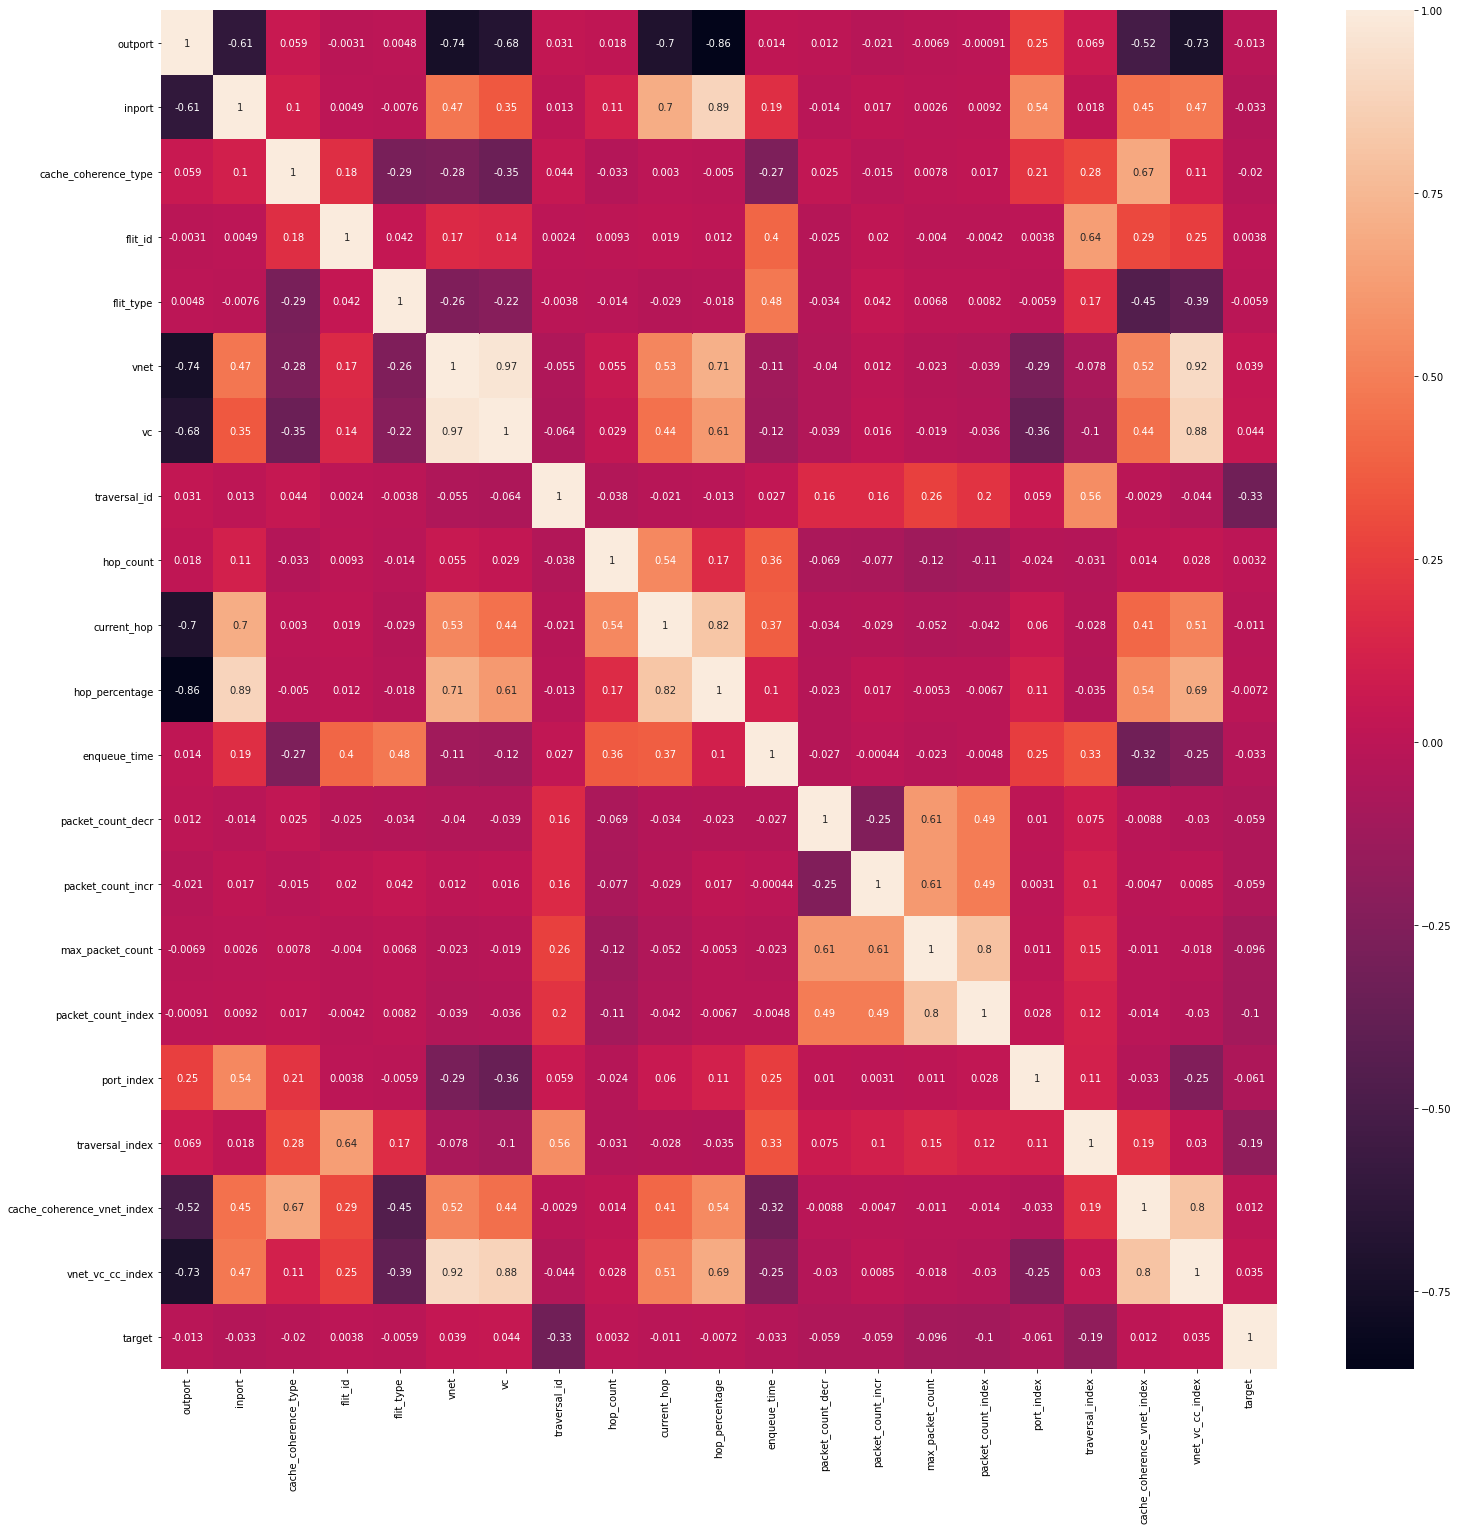

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

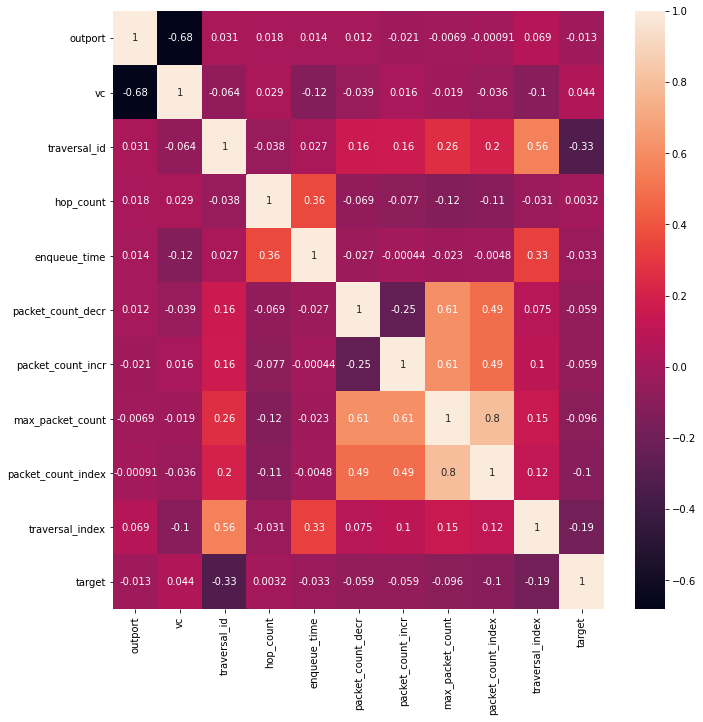

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

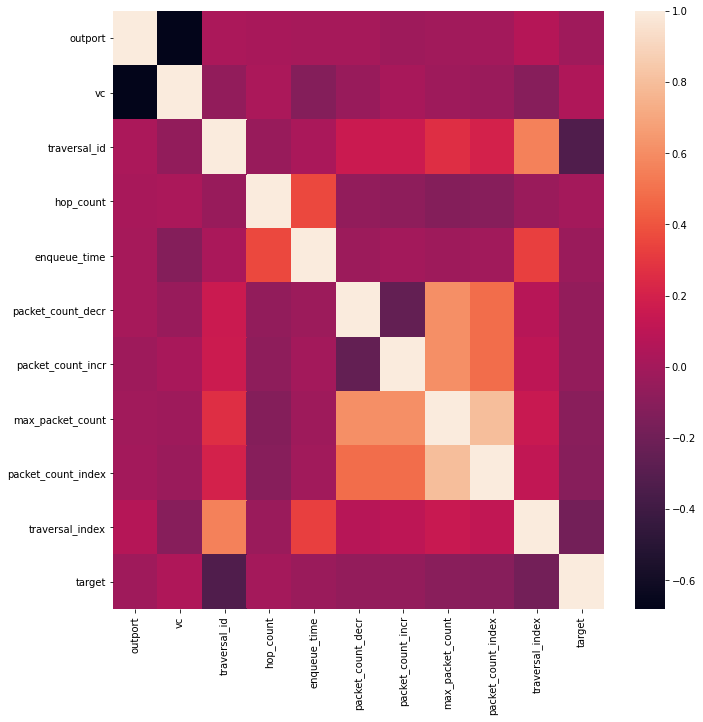

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000,0.000033,0.333333,0.000000,0.405229,0.000000,0.405229,0.010325,0.000001
1,0.75,0.000,0.000000,0.333333,0.000000,0.398693,0.000000,0.398693,0.010158,0.000000
2,0.00,1.000,0.000000,0.333333,0.119403,0.392157,0.006536,0.398693,0.020150,0.000000
3,0.00,1.000,0.000033,0.333333,0.119403,0.398693,0.006536,0.405229,0.020483,0.000001
4,0.00,1.000,0.000000,0.333333,0.134328,0.385621,0.013072,0.398693,0.029808,0.000009
...,...,...,...,...,...,...,...,...,...,...
166494,0.75,0.000,0.999967,0.166667,0.208955,0.026144,0.359477,0.385621,0.046461,0.333442
166495,0.75,0.000,0.999967,0.166667,0.313433,0.019608,0.366013,0.385621,0.037802,0.444591
166496,0.75,0.000,0.999967,0.166667,0.417910,0.013072,0.372549,0.385621,0.028809,0.833610
166497,0.75,0.125,1.000000,0.166667,0.417910,0.006536,0.379085,0.385621,0.019484,0.044458


In [20]:
train_X[train_X.duplicated()].shape

(33, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000,0.000000,0.333333,0.000000,0.401361,0.000000,0.401361,0.010633,0.000000
1,0.00,1.000,0.000000,0.333333,0.117647,0.394558,0.006803,0.401361,0.021085,0.000000
2,0.00,1.000,0.000000,0.333333,0.132353,0.387755,0.013605,0.401361,0.031177,0.000013
3,0.00,1.000,0.000000,0.333333,0.147059,0.380952,0.020408,0.401361,0.040908,0.000022
4,0.00,1.000,0.000000,0.333333,0.161765,0.374150,0.027211,0.401361,0.050279,0.000031
...,...,...,...,...,...,...,...,...,...,...
88868,0.75,0.000,0.999967,0.166667,0.102941,0.027211,0.129252,0.156463,0.017841,0.222293
88869,0.75,0.000,0.999967,0.166667,0.205882,0.020408,0.136054,0.156463,0.014958,0.333441
88870,0.75,0.000,0.999967,0.166667,0.308824,0.013605,0.142857,0.156463,0.011714,0.444590
88871,0.75,0.000,0.999967,0.166667,0.411765,0.006803,0.149660,0.156463,0.008110,0.833610


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    88036
1    78463
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1936.840273
9     traversal_index   679.278242
8  packet_count_index   171.023888
1                  vc   124.806240
7    max_packet_count   109.571733
5   packet_count_decr    55.101669
6   packet_count_incr    54.470949
4        enqueue_time    12.644871
0             outport    10.140085
3           hop_count     0.230194


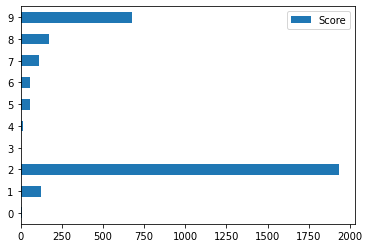

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.3313372895638
Test Prediction Score 96.70033670033669


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.23194896087675
Test Prediction Score 80.53877086973914
Test Prediction Score 81.25858072066801


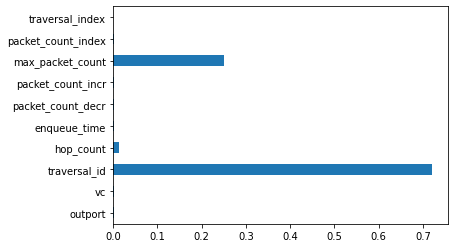

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

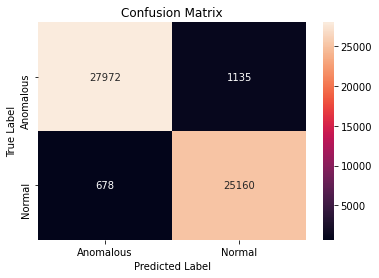

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     29107
           1       0.96      0.97      0.97     25838

    accuracy                           0.97     54945
   macro avg       0.97      0.97      0.97     54945
weighted avg       0.97      0.97      0.97     54945



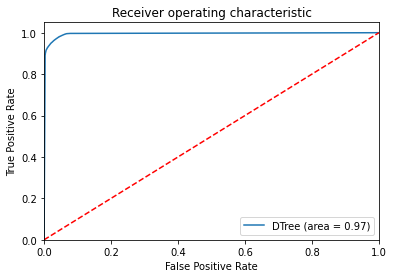

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r15l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.98834645104613
Test Prediction Score 99.77249977249977


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 83.69133482610016
Test Prediction Score 79.58818451691685
Test Prediction Score 83.69606806058833


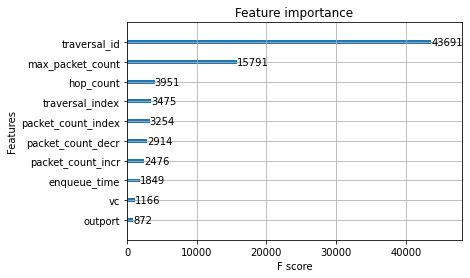

In [45]:
plot_importance(xgbc)
plt.show()

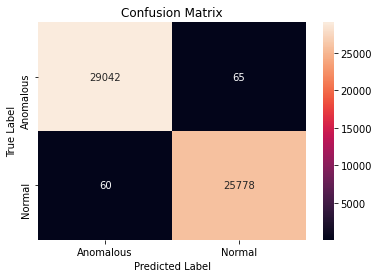

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29107
           1       1.00      1.00      1.00     25838

    accuracy                           1.00     54945
   macro avg       1.00      1.00      1.00     54945
weighted avg       1.00      1.00      1.00     54945



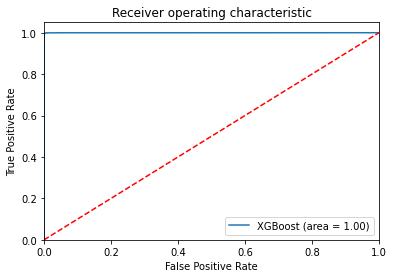

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()